### **Optimizer Explanation**

This notebook will explain **optimizers** used in neural networks with a focus on visualization. We will use simple visual tools (like plots) to demonstrate how different optimizers behave during training.

---

### **1. Introduction to Optimizers**
An **optimizer** updates model parameters (weights and biases) to minimize the loss function by computing gradients and adjusting the parameters.

**Goal**: Minimize the loss function through iterative optimization.

---

### **2. Types of Optimizers**
We will focus on the following optimizers:
1. **Gradient Descent (GD)**
2. **Stochastic Gradient Descent (SGD)**
3. **Momentum**
4. **Adagrad**
5. **RMSprop**
6. **Adam**

Each optimizer will be implemented and compared for its performance on a toy 2D loss function.

---

### **3. Visualization of Optimizers**

We use the simple 2D function:

$
    f(x, y) = x^2 + y^2
$

- This is a bowl-shaped loss surface.
- Optimizers will adjust parameters (x, y) to minimize this loss.

---

### **4. Code Sections**

#### **4.1. Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#### **4.2. Define the Loss Function and Gradient**

In [4]:
def loss_function(x, y):
    """Simple loss function: f(x, y) = x^2 + y^2"""
    return x**2 + y**2

def gradient(x, y):
    """Gradient of the loss function."""
    return np.array([2 * x, 2 * y])

#### **4.3. Visualize the Loss Surface**

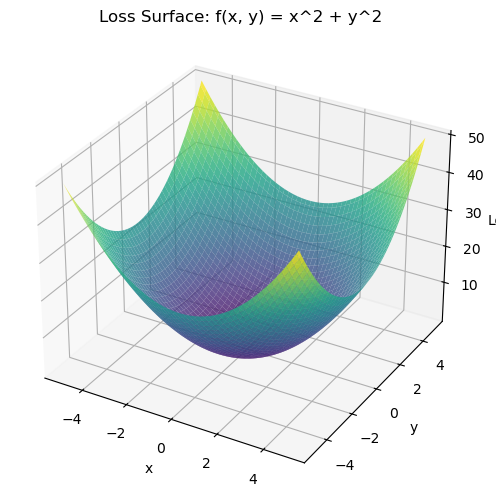

In [5]:
def plot_loss_surface():
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = loss_function(X, Y)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8)
    ax.set_title('Loss Surface: f(x, y) = x^2 + y^2')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Loss')
    plt.show()

plot_loss_surface()

---

#### **4.4. Define Optimizers**

### **Gradient Descent (GD):**

In [15]:
class GradientDescent:
    def update(self, x, y, grad, lr):
        return x - lr * grad[0], y - lr * grad[1]

In [16]:
# Initialize values
x, y = 3.0, 4.0  # Starting point (initial guess)
learning_rate = 0.1  # Step size for updates
epochs = 20  # Number of iterations

In [18]:
# Store values for visualization
history_x = [x]  # Track x values
history_y = [y]  # Track y values
history_z = [loss_function(x, y)]  # Track function values

In [19]:
# Initialize the optimizer
optimizer = GradientDescent()

In [21]:
# Gradient descent process
for _ in range(epochs):
    grad_x, grad_y = gradient(x, y)  # Compute gradients
    x, y = optimizer.update(x, y, (grad_x, grad_y), learning_rate)  # Update x and y
    
    # Record new values for visualization
    history_x.append(x)
    history_y.append(y)
    history_z.append(loss_function(x, y))

In [23]:
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = loss_function(X, Y)  # Compute function values on the grid

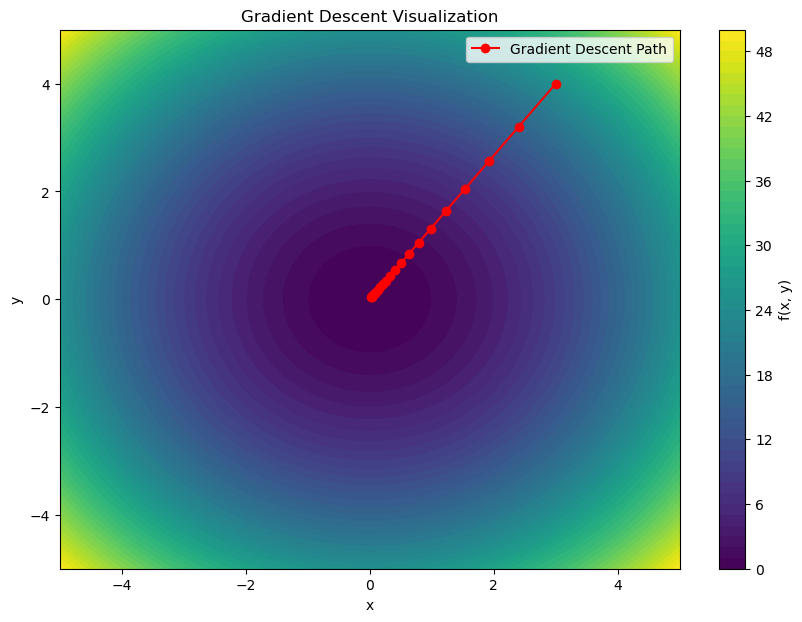

In [24]:
plt.figure(figsize=(10, 7))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')  # Contour plot of f(x, y)
plt.colorbar(label='f(x, y)')
plt.plot(history_x, history_y, 'r-o', label='Gradient Descent Path')  # Path of updates
plt.title("Gradient Descent Visualization")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### **1. Concept of Gradient Descent:**
Gradient descent is an optimization algorithm used to minimize functions by adjusting variables iteratively. It moves in the direction of the negative gradient of the function to find the minimum.

---

### **2. Function Definition:**
We are minimizing the function $( f(x, y) = x^2 + y^2 )$, which is a simple paraboloid. Its minimum is at the origin (0, 0).

- **Gradient Calculation:**  
  The gradient of this function is:  
  $
  \nabla f(x, y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = (2x, 2y)
  $
  This gradient points toward the steepest ascent, so we move in the opposite direction.

---

### **3. Initialization:**
- **Starting Point:** The initial values of `x` and `y` are set to 3.0 and 4.0, respectively.
- **Learning Rate:** The learning rate (step size) is set to 0.1, controlling how large each update step is.
- **Epochs:** We run the optimization for 20 steps (iterations).

---

### **4. Update Rule:**
In each iteration:
1. The gradients $((2x, 2y))$ are calculated.
2. The new values of `x` and `y` are computed using the update rule:
   $
   x_{\text{new}} = x - \text{learning rate} \cdot \frac{\partial f}{\partial x}
   $
   $
   y_{\text{new}} = y - \text{learning rate} \cdot \frac{\partial f}{\partial y}
   $
3. These updated values move `x` and `y` closer to the minimum point (0,0).

---

### **5. Visualization:**
1. **Contour Plot:** A contour plot of \( loss_function(x, y) \) is created using a grid of points.
2. **Path Tracking:** The movement of points during the optimization process is plotted as a red line with circles, showing how the algorithm converges to the minimum.
3. **Result:** The path clearly shows decreasing function values, moving from the initial point to the minimum.

---

### **Key Insights:**
- **Learning Rate Impact:** A smaller learning rate would make the descent slower but more stable. A larger one could overshoot the minimum.
- **Epochs Count:** Increasing epochs allows more iterations, improving convergence.
- **Generalization:** The same approach can be applied to more complex functions by extending the gradient calculation.

### **Momentum:**

In [43]:
class MomentumGD:
    def __init__(self, momentum=0.9):
        self.vx, self.vy = 0, 0
        self.momentum = momentum
    
    def update(self, x, y, grad, lr):
        self.vx = self.momentum * self.vx - lr * grad[0]
        self.vy = self.momentum * self.vy - lr * grad[1]
        return x + self.vx, y + self.vy

In [44]:
optimizer = MomentumGD(momentum=0.9)

In [45]:
# Initialize values
x, y = 3.0, 4.0  # Starting point (initial guess)
learning_rate = 0.1  # Step size for updates
epochs = 20  # Number of iterations

In [46]:
# Store values for visualization
history_x = [x]  # Track x values
history_y = [y]  # Track y values
history_z = [loss_function(x, y)]  # Track function values

In [47]:
for _ in range(epochs):
    grad_x, grad_y = gradient(x, y)  # Compute gradients
    x, y = optimizer.update(x, y, (grad_x, grad_y), learning_rate)  # Update x and y
    
    # Record new values for visualization
    history_x.append(x)
    history_y.append(y)
    history_z.append(loss_function(x, y))

In [48]:
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = loss_function(X, Y)  # Compute function values on the grid

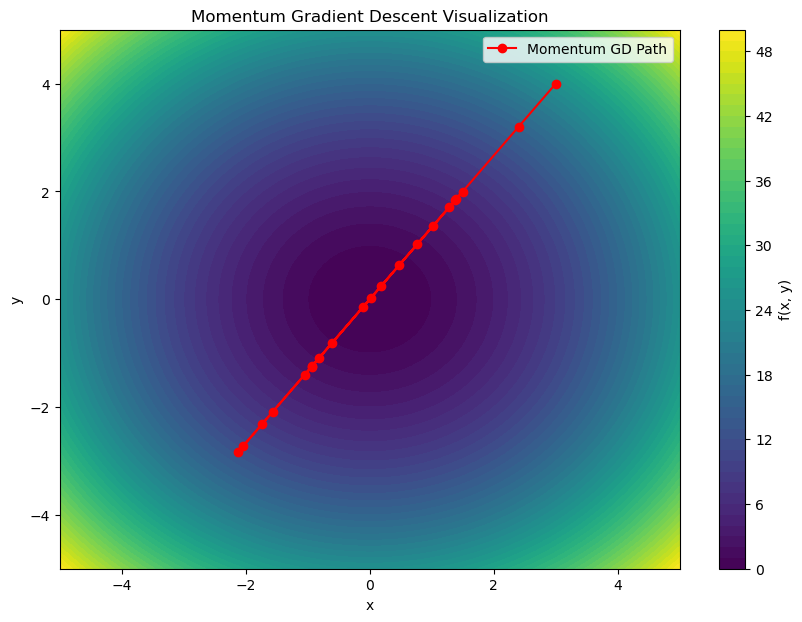

In [49]:
# Plot the function and the path of gradient descent
plt.figure(figsize=(10, 7))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')  # Contour plot of f(x, y)
plt.colorbar(label='f(x, y)')
plt.plot(history_x, history_y, 'r-o', label='Momentum GD Path')  # Path of updates
plt.title("Momentum Gradient Descent Visualization")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### **1. Momentum-Based Gradient Descent Concept:**
Momentum Gradient Descent enhances the standard gradient descent by adding a velocity term that keeps track of past updates. This helps to accelerate convergence and smooth out oscillations.

---

### **2. Initialization:**
- **Starting Point:** `x` and `y` are initialized at (3.0, 4.0).
- **Learning Rate:** A step size of 0.1 is used.
- **Momentum:** Set to 0.9, meaning 90% of the previous update is retained.
- **Velocity Initialization:** Velocities `vx` and `vy` are set to zero.

---

### **3. Update Rule:**
In each iteration:
1. **Velocity Update:**
   - `vx = momentum * vx - learning_rate * grad_x`
   - `vy = momentum * vy - learning_rate * grad_y`
   - The old velocity is scaled by the momentum factor and updated with the negative gradient scaled by the learning rate.

2. **Position Update:**
   - `x_new = x + vx`
   - `y_new = y + vy`
   - This applies the velocity-based movement to `x` and `y`.

---

### **4. Gradient Calculation:**
The gradient of the loss function $( f(x, y) = x^2 + y^2 )$ is:
$
\frac{\partial f}{\partial x} = 2x, \quad \frac{\partial f}{\partial y} = 2y
$
This guides the updates toward the function’s minimum at (0, 0).

---

### **5. Visualization:**
1. **Meshgrid Creation:** A 2D grid of points in the range (-5, 5) is created for visualization.
2. **Contour Plot:** A filled contour plot of the loss function is drawn.
3. **Path Plot:** The red line with circles shows the trajectory of points as they move toward the minimum.

---

### **Key Insights:**
- **Faster Convergence:** Momentum accelerates movement along flat regions while damping oscillations.
- **Reduced Oscillations:** Helps smooth out updates in steep regions by using past movements.
- **Learning Rate Sensitivity:** If the learning rate is too high, momentum might cause overshooting.

### **Adagrad:**

In [8]:
class Adagrad:
    def __init__(self, epsilon=1e-8):
        self.sx, self.sy = 0, 0
        self.epsilon = epsilon
    
    def update(self, x, y, grad, lr):
        self.sx += grad[0]**2
        self.sy += grad[1]**2
        x -= lr * grad[0] / (np.sqrt(self.sx) + self.epsilon)
        y -= lr * grad[1] / (np.sqrt(self.sy) + self.epsilon)
        return x, y

In [50]:
# Initialize values
x, y = 3.0, 4.0  # Starting point (initial guess)
learning_rate = 0.1  # Step size for updates
epochs = 20  # Number of iterations

In [51]:
# Store values for visualization
history_x = [x]  # Track x values
history_y = [y]  # Track y values
history_z = [loss_function(x, y)]  # Track function values

In [52]:
# Initialize the optimizer
optimizer = Adagrad(epsilon=1e-8)

In [53]:
# Gradient descent process
for _ in range(epochs):
    grad_x, grad_y = gradient(x, y)  # Compute gradients
    x, y = optimizer.update(x, y, (grad_x, grad_y), learning_rate)  # Update x and y
    
    # Record new values for visualization
    history_x.append(x)
    history_y.append(y)
    history_z.append(loss_function(x, y))

In [54]:
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = loss_function(X, Y)  # Compute function values on the grid

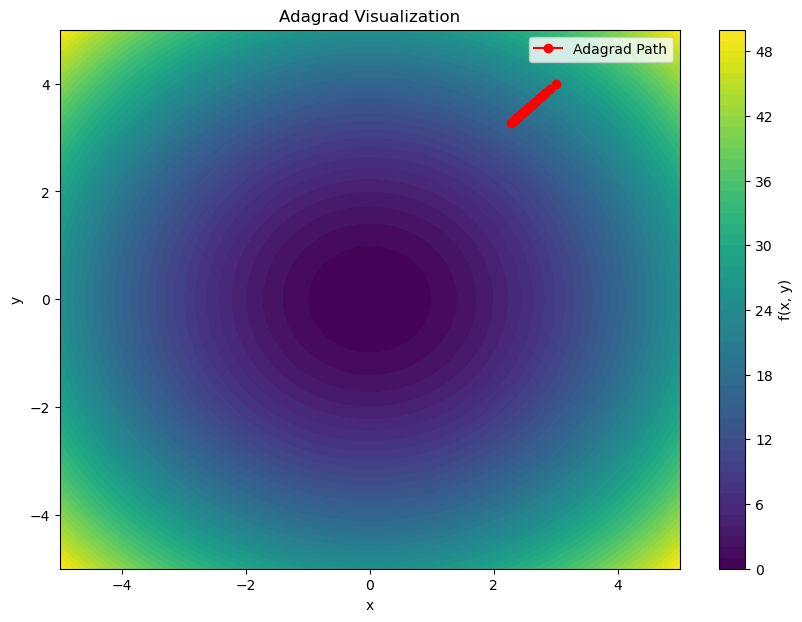

In [55]:
# Plot the function and the path of gradient descent
plt.figure(figsize=(10, 7))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')  # Contour plot of f(x, y)
plt.colorbar(label='f(x, y)')
plt.plot(history_x, history_y, 'r-o', label='Adagrad Path')  # Path of updates
plt.title("Adagrad Visualization")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### **Adagrad Optimization Overview:**

Adagrad (Adaptive Gradient Algorithm) is an adaptive learning rate optimization method that adjusts the learning rate for each parameter based on the accumulated squared gradients. This allows the learning rate to decrease over time, making large updates early in training and smaller updates later.

---

### **1. Initialization:**
- **Starting Point:** The variables `x` and `y` are initialized at (3.0, 4.0).
- **Learning Rate:** A fixed step size of 0.1 is used.
- **Epsilon:** A small constant $( \epsilon = 10^{-8} )$ prevents division by zero.

---

### **2. Update Rule:**
Adagrad adjusts learning rates using the sum of past squared gradients:

1. **Gradient Accumulation:**
   - The squared gradients for `x` and `y` are accumulated as:
     $
     s_x = s_x + \left(\frac{\partial f}{\partial x}\right)^2
     $
     $
     s_y = s_y + \left(\frac{\partial f}{\partial y}\right)^2
     $

2. **Parameter Update:**
   - The learning rates are scaled inversely proportional to the square root of accumulated gradients:
     $
     x_{\text{new}} = x - \frac{\text{lr} \cdot \frac{\partial f}{\partial x}}{\sqrt{s_x} + \epsilon}
     $
     $
     y_{\text{new}} = y - \frac{\text{lr} \cdot \frac{\partial f}{\partial y}}{\sqrt{s_y} + \epsilon}
     $
   - This makes the learning rate smaller for parameters that have frequently received large gradients.

---

### **3. Why Use Adagrad?**
- **Advantages:**
  - **Automatic Adjustment:** It adapts learning rates for each parameter.
  - **No Manual Tuning:** Reduces the need for manually adjusting learning rates.

- **Challenges:**
  - **Decay Problem:** The learning rate keeps decreasing, possibly causing premature stopping.
  - **Solution:** Methods like Adadelta or RMSprop were developed to fix this.

---

### **4. Visualization Explanation:**
- **Meshgrid Creation:** The 2D space for the function $( f(x, y) = x^2 + y^2 )$ is visualized as a contour plot.
- **Path Tracking:** The red line with circles shows the path of updates using Adagrad.
- **Result:** The steps shrink over time, showing how Adagrad slows down updates as it converges to the minimum (0,0).

### **RMSprop:**

In [56]:
class RMSProp:
    def __init__(self, beta=0.9, epsilon=1e-8):
        self.sx, self.sy = 0, 0
        self.beta = beta
        self.epsilon = epsilon

    def update(self, x, y, grad, lr):
        self.sx = self.beta * self.sx + (1 - self.beta) * grad[0]**2
        self.sy = self.beta * self.sy + (1 - self.beta) * grad[1]**2
        x -= lr * grad[0] / (np.sqrt(self.sx) + self.epsilon)
        y -= lr * grad[1] / (np.sqrt(self.sy) + self.epsilon)
        return x, y

In [57]:
# Initialize values
x, y = 3.0, 4.0  # Starting point (initial guess)
learning_rate = 0.1  # Step size for updates
epochs = 20  # Number of iterations

In [58]:
# Store values for visualization
history_x = [x]  # Track x values
history_y = [y]  # Track y values
history_z = [loss_function(x, y)]  # Track function values

In [59]:
# Gradient descent process
for _ in range(epochs):
    grad_x, grad_y = gradient(x, y)  # Compute gradients
    x, y = optimizer.update(x, y, (grad_x, grad_y), learning_rate)  # Update x and y
    
    # Record new values for visualization
    history_x.append(x)
    history_y.append(y)
    history_z.append(loss_function(x, y))

In [60]:
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = loss_function(X, Y)  # Compute function values on the grid

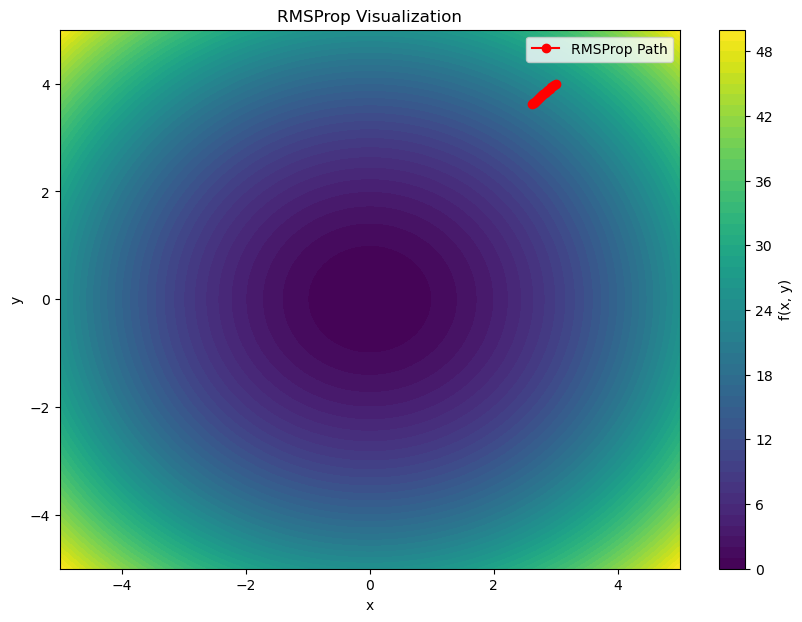

In [61]:
# Plot the function and the path of gradient descent
plt.figure(figsize=(10, 7))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')  # Contour plot of f(x, y)
plt.colorbar(label='f(x, y)')
plt.plot(history_x, history_y, 'r-o', label='RMSProp Path')  # Path of updates
plt.title("RMSProp Visualization")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### **Adam:**

In [10]:
class Adam:
    def __init__(self, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m1, self.m2, self.v1, self.v2 = 0, 0, 0, 0
        self.beta1, self.beta2, self.epsilon = beta1, beta2, epsilon
        self.t = 0
    
    def update(self, x, y, grad, lr):
        self.t += 1
        self.m1 = self.beta1 * self.m1 + (1 - self.beta1) * grad[0]
        self.m2 = self.beta1 * self.m2 + (1 - self.beta1) * grad[1]
        self.v1 = self.beta2 * self.v1 + (1 - self.beta2) * grad[0]**2
        self.v2 = self.beta2 * self.v2 + (1 - self.beta2) * grad[1]**2
        m1_hat, m2_hat = self.m1 / (1 - self.beta1**self.t), self.m2 / (1 - self.beta1**self.t)
        v1_hat, v2_hat = self.v1 / (1 - self.beta2**self.t), self.v2 / (1 - self.beta2**self.t)
        x -= lr * m1_hat / (np.sqrt(v1_hat) + self.epsilon)
        y -= lr * m2_hat / (np.sqrt(v2_hat) + self.epsilon)
        return x, y

In [62]:
# Initialize values
x, y = 3.0, 4.0  # Starting point (initial guess)
learning_rate = 0.1  # Step size for updates
epochs = 20  # Number of iterations

In [63]:
# Store values for visualization
history_x = [x]  # Track x values
history_y = [y]  # Track y values
history_z = [loss_function(x, y)]  # Track function values

In [64]:
# Initialize the optimizer
optimizer = Adam(beta1=0.9, beta2=0.999, epsilon=1e-8)

In [65]:
# Gradient descent process
for _ in range(epochs):
    grad_x, grad_y = gradient(x, y)  # Compute gradients
    x, y = optimizer.update(x, y, (grad_x, grad_y), learning_rate)  # Update x and y
    
    # Record new values for visualization
    history_x.append(x)
    history_y.append(y)
    history_z.append(loss_function(x, y))

In [66]:
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = loss_function(X, Y)  # Compute function values on the grid

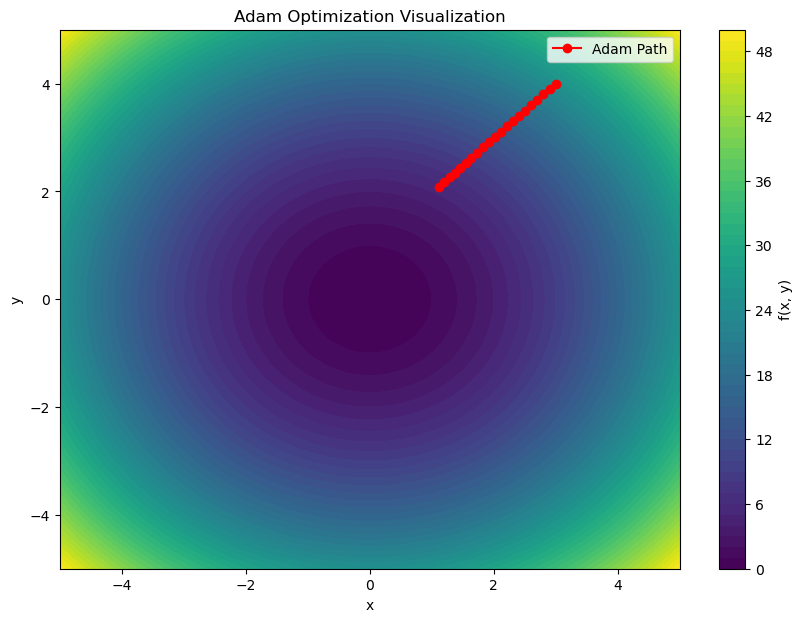

In [67]:
# Plot the function and the path of gradient descent
plt.figure(figsize=(10, 7))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')  # Contour plot of f(x, y)
plt.colorbar(label='f(x, y)')
plt.plot(history_x, history_y, 'r-o', label='Adam Path')  # Path of updates
plt.title("Adam Optimization Visualization")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### **Adam Optimization Overview:**
Adam (Adaptive Moment Estimation) is an advanced optimization algorithm combining momentum and adaptive learning rates. It maintains estimates of both the first moment (mean) and second moment (variance) of gradients.

---

### **1. Initialization:**
- **Moment Estimations:** 
  - First moments (`m1`, `m2`) track the average of gradients.
  - Second moments (`v1`, `v2`) track the average of squared gradients.
- **Hyperparameters:** 
  - `beta1` (default 0.9) for the first moment decay.
  - `beta2` (default 0.999) for the second moment decay.
  - `epsilon` (small value) prevents division by zero.
- **Time Step `t`:** Tracks the number of updates performed.

---

### **2. Update Rule:**
1. **Moment Updates:**
   - The first moment (mean) accumulates gradient averages:
     $
     m_x = \beta_1 m_x + (1 - \beta_1) \frac{\partial f}{\partial x}
     $
     $
     m_y = \beta_1 m_y + (1 - \beta_1) \frac{\partial f}{\partial y}
     $

   - The second moment (variance) accumulates squared gradients:
     $
     v_x = \beta_2 v_x + (1 - \beta_2) \left(\frac{\partial f}{\partial x}\right)^2
     $
     $
     v_y = \beta_2 v_y + (1 - \beta_2) \left(\frac{\partial f}{\partial y}\right)^2
     $

2. **Bias Correction:**
   - Corrects for initialization bias:
     $
     \hat{m}_x = \frac{m_x}{1 - \beta_1^t}, \quad \hat{m}_y = \frac{m_y}{1 - \beta_1^t}
     $
     $
     \hat{v}_x = \frac{v_x}{1 - \beta_2^t}, \quad \hat{v}_y = \frac{v_y}{1 - \beta_2^t}
     $

3. **Parameter Updates:**
   - Update `x` and `y` using the corrected estimates:
     $
     x_{\text{new}} = x - \frac{\text{learning rate} \cdot \hat{m}_x}{\sqrt{\hat{v}_x} + \epsilon}
     $
     $
     y_{\text{new}} = y - \frac{\text{learning rate} \cdot \hat{m}_y}{\sqrt{\hat{v}_y} + \epsilon}
     $

---

### **3. Why Use Adam?**
- **Advantages:**
  - Combines momentum and adaptive learning rates.
  - Works well with noisy and sparse gradients.
  - Requires minimal tuning of the learning rate.

- **Challenges:**
  - Can overfit if learning rates are too high.
  - May require adjustments in highly non-convex problems.

---

### **4. Visualization Summary:**
- **Meshgrid & Contour Plot:** A 2D grid shows the contour plot of the function $( f(x, y) = x^2 + y^2 )$.
- **Path Tracking:** The red line with circles represents the optimization path.
- **Results:** Adam moves efficiently toward the minimum, demonstrating adaptive updates and momentum accumulation.

---

The main differences between optimization algorithms like Gradient Descent, Momentum, Adagrad, RMSProp, and Adam lie in how they adjust learning rates and update parameters during training. Here's a breakdown:

---

### **1. Gradient Descent (GD):**
**How It Works:**
- Updates parameters using the negative gradient of the loss function.
- Uses a constant learning rate.

**Key Features:**
- Simple but can be slow.
- May struggle in ravines or with oscillations.

**Use Case:** Suitable for simple, convex problems.

---

### **2. Momentum:**
**How It Works:**
- Adds a velocity term to updates, accelerating movement along consistent gradient directions.
- Updates consider both the current and previous gradients.

**Key Features:**
- Reduces oscillations in steep directions.
- Speeds up convergence along flat regions.

**Use Case:** Useful in deep learning for handling complex functions.

---

### **3. Adagrad (Adaptive Gradient Algorithm):**
**How It Works:**
- Adapts learning rates for each parameter based on past squared gradients.
- Learning rate decreases over time.

**Key Features:**
- No manual learning rate tuning.
- Slows down updates significantly as training progresses.

**Use Case:** Good for sparse data and NLP tasks.

---

### **4. RMSProp (Root Mean Square Propagation):**
**How It Works:**
- Similar to Adagrad but uses an exponentially decaying average of past squared gradients.
- Maintains a more stable learning rate over time.

**Key Features:**
- Solves Adagrad's learning rate decay problem.
- Works well for non-stationary problems.

**Use Case:** Widely used in recurrent neural networks (RNNs) and time-series tasks.

---

### **5. Adam (Adaptive Moment Estimation):**
**How It Works:**
- Combines momentum (first moment) and adaptive learning rates (second moment).
- Corrects bias in the first few updates.

**Key Features:**
- Fast convergence.
- Works well for both large and small datasets.

**Use Case:** Default optimizer for many deep learning tasks due to its versatility.

---

### **Summary of Differences:**
| Optimizer   | Learning Rate | Memory of Past Updates | Bias Correction | Best Use Case |
|-------------|----------------|-------------------------|----------------|----------------|
| GD          | Fixed          | None                   | No             | Simple tasks  |
| Momentum    | Fixed          | First moment (mean)    | No             | Complex landscapes |
| Adagrad     | Adaptive       | Past squared gradients | No             | Sparse data   |
| RMSProp     | Adaptive       | Exponentially weighted | No             | Time-series tasks |
| Adam        | Adaptive       | First & second moments | Yes            | Deep learning tasks |

---